## Assumptions

1. Subject will reach points at event seconds
2. Speed is adjusted if points limit velocity and acceleration

A smoothing filter is applied to identify points where the route turn is beyond a threshold. This creates a constraint for where output points will be to create smooth animation.

## Algorithm

1. Given a list of locations on a route $polyline$
2. Create a $smoothRoute = smooth(polyline)$ where every location is changing route direction by $SmoothRouteThreshold$
3. Create a $speedGraph$ where locations and roads have a speed, roads have max and locations have a minimum
4. Interpolate each location to location with 1/s connection locations

### Constraints
- $SmoothRouteThreshold$ Maximum direction change between two points
- $SpeedGraph$ Every point and edge has a desired speed

### Equations

EDIT: these all changed after hacking

Calculate the accelaration

- Accelera iteration $a(t)=min(MAX_A, MAX_V-v(t-1))$
- Accelera iteration $a(t)=MAX_A$ if $d(t)*v(t) < D$
- Decelera iteration $a(t)=MIN_A$ if $d(t)*v(t) > D$
- Constant iteration $a(t)=0$ if $v(t) == MAX_V$

Update the subject

- Velocity iteration $v(t)=v(t-1)+a(t)$
- Position iteration $p(t)=p(t-1)+\frac{v(t) + v(t-1)}{2\Delta{t}}$
- Distance iteration $d(t)=D-p(t)$

In [1]:
def distanceToStop(velocity, acceleration):
    distanceToStop = velocity * -acceleration
    while (velocity > 0):
        velocityNext = velocity + acceleration
        distanceToStop += (velocity + velocityNext) / 2.0
        velocity = velocityNext
    return distanceToStop

stoppingDistance:46.0 remainingDistance:200.32 slowDownFactor:0.22963258785942492
stoppingDistance:53.0 remainingDistance:189.82 slowDownFactor:0.2792118849436308
stoppingDistance:66.5 remainingDistance:177.82 slowDownFactor:0.37397368125070296
stoppingDistance:90.0 remainingDistance:163.32 slowDownFactor:0.5510653930933138
stoppingDistance:126.5 remainingDistance:145.32 slowDownFactor:0.8704927057528214
stoppingDistance:126.5 remainingDistance:125.32 slowDownFactor:1.0094158953080115
stoppingDistance:116.5 remainingDistance:105.82 slowDownFactor:1.100926100926101
stoppingDistance:99.0 remainingDistance:87.82 slowDownFactor:1.1273058528808928
stoppingDistance:74.5 remainingDistance:72.32 slowDownFactor:1.0301438053097347
stoppingDistance:53.0 remainingDistance:59.81999999999999 slowDownFactor:0.8859913072550988
stoppingDistance:53.0 remainingDistance:48.81999999999999 slowDownFactor:1.0856206472757068
stoppingDistance:46.0 remainingDistance:38.31999999999999 slowDownFactor:1.2004175365

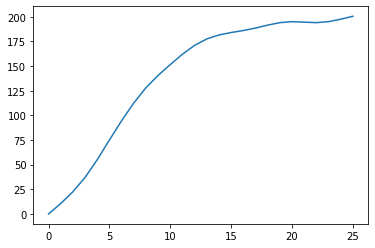

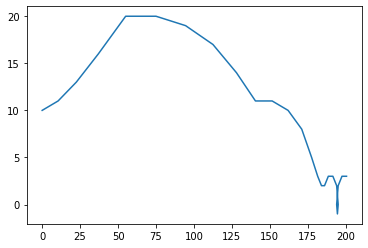

t:0	a:0	v:10	p:0
t:1	a:1	v:11	p:10.5
t:2	a:2	v:13	p:22.5
t:3	a:3	v:16	p:37.0
t:4	a:4	v:20	p:55.0
t:5	a:0	v:20	p:75.0
t:6	a:-1	v:19	p:94.5
t:7	a:-2	v:17	p:112.5
t:8	a:-3	v:14	p:128.0
t:9	a:-3	v:11	p:140.5
t:10	a:0	v:11	p:151.5
t:11	a:-1	v:10	p:162.0
t:12	a:-2	v:8	p:171.0
t:13	a:-3	v:5	p:177.5
t:14	a:-2	v:3	p:181.5
t:15	a:-1	v:2	p:184.0
t:16	a:0	v:2	p:186.0
t:17	a:1	v:3	p:188.5
t:18	a:0	v:3	p:191.5
t:19	a:-1	v:2	p:194.0
t:20	a:-2	v:0	p:195.0
t:21	a:-1	v:-1	p:194.5
t:22	a:1	v:0	p:194.0
t:23	a:2	v:2	p:195.0
t:24	a:1	v:3	p:197.5
t:25	a:0	v:3	p:200.5


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# input with all units the same
# keep integers
distance = 200.32
maxAcceleration = 4
minAcceleration = -3
maxVelocity = 27

endVelocity = 0
t = [0]
a = [0]
v = [10]
p = [0]
for i in range(1, 2000):
    # Remaining distance
    remainingDistance = distance - p[i-1]
    if (remainingDistance <= 0):
        break
    t.append(i)
    
    # Calculate acceleration
    aNow = min(a[i-1]+1, maxAcceleration)
    if (v[i-1] == maxVelocity):
        aNow = 0
    elif (v[i-1] > maxVelocity):
        aNow = -1
    
    stoppingDistance = distanceToStop(v[i-1], minAcceleration)
    slowDownFactor = stoppingDistance / remainingDistance
    if (slowDownFactor*slowDownFactor > 0.70):
        aNow = 0
        
    print("stoppingDistance:%s remainingDistance:%s slowDownFactor:%s" %(stoppingDistance, remainingDistance, slowDownFactor))
    if (stoppingDistance >= remainingDistance):
        aNow = max(a[i-1]-1, minAcceleration)
        
    if (v[i-1] < endVelocity):
        aNow = max(aNow+1, 0)
    
    a.append(aNow)
     
    # Calculate speed
    v.append(v[i-1] + a[i])
    
    # Calculate position
    pDelta = (v[i] + v[i-1]) / 2.0
    p.append(p[i-1] + pDelta)
    
    
plt.plot(t, p)
plt.show()

plt.plot(p, v)
plt.show()

zipped = zip(t, a, v, p)
for values in zipped: 
    print ("t:%s\ta:%s\tv:%s\tp:%s" %(values[0], values[1], values[2], values[3])) 